# Final Project: *Predicting AirBnB listings prices in Los Angeles*

## 1. Problem
For my final project, I'm building a model that can predict an AirBnB listing prices for any potential listing in the Los Angeles area.  Ideally I would then be able to use the same model to help predict prices in any major city.  

Problem with our dataset is that it only contains data from AirBnB listings from Los Angeles and not any other city.  There seems to be a lot of data cleaning and manulipuation that must be done in order to get our model into working order.

*How Model Can Inform Decision Making*

Creating such a model could be helpful for AirBnB as they could lure potential hosts to create listings.  More listings on AirBnB would in turn create more revenue for AirBnb.  For potential hosts it could give them a sense of what their potential earnings would be if they deciede to open their homes to travelers. 

## 2. Approach Overview

### 2.1 Data Source
The data I will be using for this project comes from https://www.kaggle.com/oindrilasen/la-airbnb-listings.  It comes with a great deal of columns but many of them are irrevealent data, data such as URLs to different pictures and thumbnails of the listings.  I'll also have to convert data that might in a string format into a numeric value that our model can use to help predict our target value.

### 2.2 Target Variable
I'll be attempting to predict the price of our AirBnB listings.

### 2.3 Feature Variables
There are a items that come immeditataly to mind that could be of interest as a feature variables.  The location of listings, the types of listings, the number of people a listing can accomedate and ammenities a listing might have.

### 2.4 Model Approach
I will look at all data from columns that could be used as our feature variables.  See what we have to do to that data in order to get it into a form that our model can use to predict our target variable.  If there is any missing data and how we have to handle those missing values.  Take a look into how our data is skewed.  If I need to use any feature engineering in order to correct this.  I'll also look to see if there are any outliers that might throw our model's predictions.

## 3. Data Preparation

### 3.1 Load main dataset

In [1]:
# Notebook preparation
# Import all libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics.scorer import make_scorer

%matplotlib inline

In [2]:
# Load our main dataset
la_airbnbs = pd.read_csv('../data/la_airbnb_retail_listings.csv', low_memory = False)

### 3.2 Initial data exploration

In [3]:
la_airbnbs.shape

(31253, 95)

In [4]:
la_airbnbs.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [5]:
la_airbnbs.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

- We have 95 columns with 31253 entries.  Many of the columns are repetitive or not helpful information that we can use to build our model.  We'll drop the non useful columns and create a new dataset from the remaining columns. 

In [6]:
cleaned_la_airbnbs = la_airbnbs.drop(['host_has_profile_pic', 'thumbnail_url', 'host_url',
                                      'medium_url', 'picture_url', 'xl_picture_url', 'host_picture_url',
                                     'listing_url', 'weekly_price', 'monthly_price', 'host_thumbnail_url',
                                     'scrape_id', 'latitude', 'longitude', 'host_response_rate', 'requires_license',
                                     'require_guest_profile_picture', 'jurisdiction_names', 'last_scraped', 'summary', 
                                     'description', 'name', 'neighbourhood', 'state', 'country',
                                      'market', 'license', 'first_review', 'last_review', 'calendar_last_scraped',
                                     'neighbourhood_group_cleansed', 'host_about', 'house_rules', 'country_code',
                                     'street', 'transit', 'access', 'space', 'notes', 'interaction',
                                     'smart_location', 'calendar_updated', 'experiences_offered',
                                     'neighborhood_overview', 'host_acceptance_rate', 'host_location',
                                     'host_neighbourhood', 'host_response_time', 'host_name'], axis = 'columns')

In [7]:
cleaned_la_airbnbs.shape

(31253, 46)

In [8]:
# See which columns have missing values
cleaned_la_airbnbs.isna().sum()

id                                      0
host_id                                 0
host_since                             14
host_is_superhost                      14
host_listings_count                    14
host_total_listings_count              14
host_verifications                      0
host_identity_verified                 14
neighbourhood_cleansed                  0
city                                   11
zipcode                               395
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              97
bedrooms                               35
beds                                   59
bed_type                                0
amenities                               0
square_feet                         30869
price                                   0
security_deposit                    14397
cleaning_fee                      

## 4. Data exploration

In [9]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].dropna().mean()

1.3501185213658786

In [10]:
cleaned_la_airbnbs.loc[:, 'beds'].dropna().mean()

1.8889850612297236

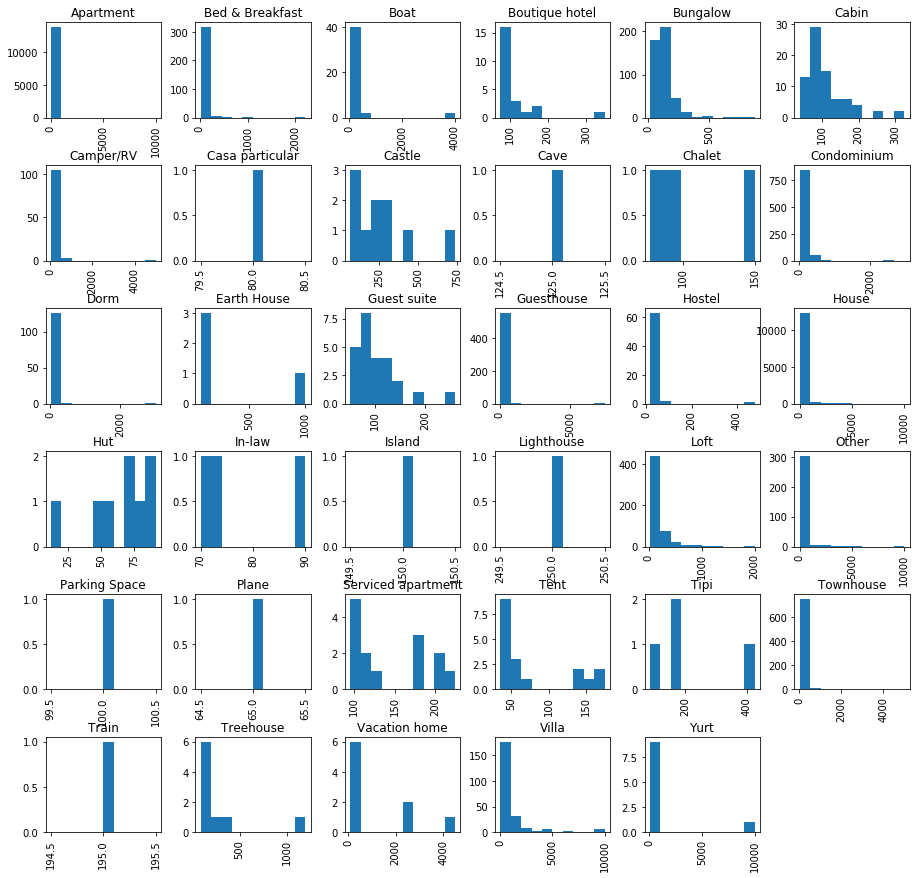

In [13]:
# Plot the different types of housing verses the price of rental
ax = cleaned_la_airbnbs.hist(column='price', by='property_type', figsize=(15, 15), bins = 10)

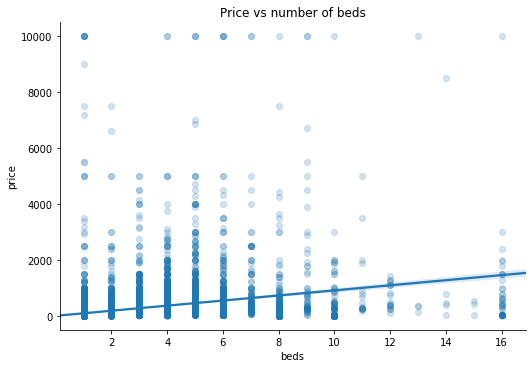

In [14]:
g = sns.lmplot(x = 'beds', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of beds');

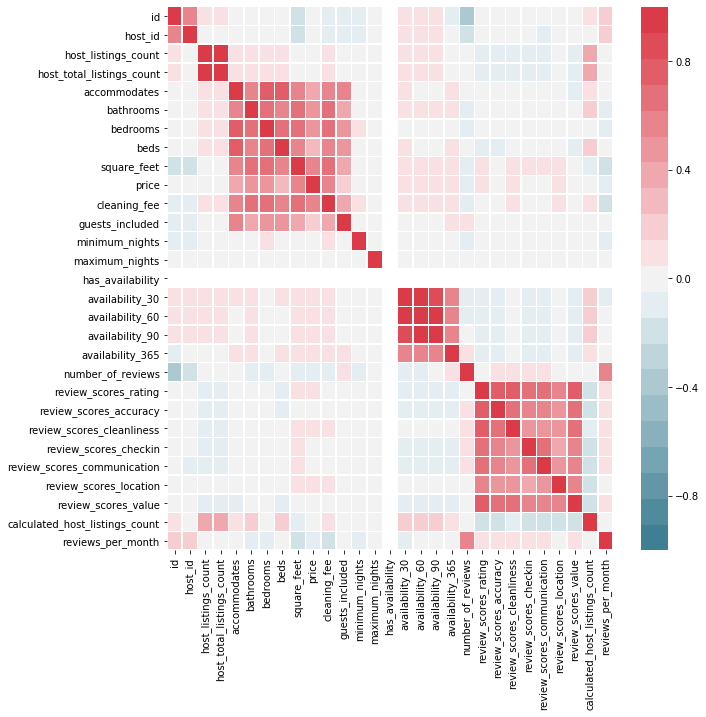

In [15]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(cleaned_la_airbnbs.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

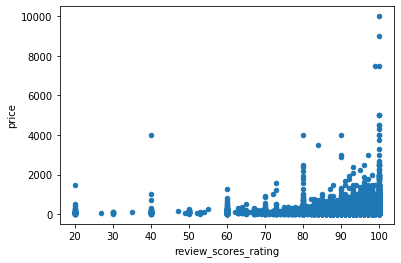

In [16]:
# Plot the resulting model on top of the corresponding scatterplot
ax = cleaned_la_airbnbs.plot(kind = 'scatter', x = 'review_scores_rating', y = 'price')

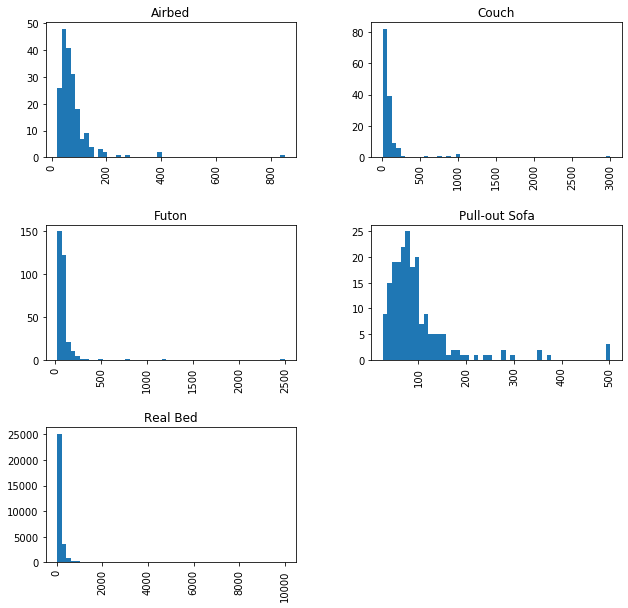

In [17]:
ax = cleaned_la_airbnbs.hist(column='price', by='bed_type', figsize=(10, 10), bins = 50)

- We can notice that there is a lot of heavy skewing with out data in comparasion to our target variables.

- We see that there a bunch of price outliers from our scatter plot of number of beds.  You'll that there are a few listings that charge $10,000 for 1 bed.  This could have happened by mistake or purposly because its a historical site, either way this doesnt help us predict the other listings so we'll drop them.

- We also notice that there are over 7,000 listings that have zero reviews or cleaning fees.  This is probably from people making a listing to see how much they can get or what is required from AirBnB to create a listing.  We will assume that they aren't real listings and drop those as well.

- After looking at our data we notice that 'neighbourhood_cleansed', 'city', 'zipcode' are all very similar information.  We want to use zipcodes as they are in a numerical format already, but some of that data is missing, entered incorrectly or entered in a different format.  We also notice that 'neighbourhood_cleansed' has no missing fields and is a more specific location that our 'city' column.

## 5. Data manipulation

In [11]:
# Clean 'price' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'price'] = cleaned_la_airbnbs.loc[:, 'price'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
# Clean 'cleaning_fee' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'cleaning_fee'] = cleaned_la_airbnbs.loc[:, 'cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

- We will now import another dataset that contains a zipcode lookup table for all zipcodes in the United States.  We'll hopefully be able to use 'neighbourhood_cleansed' to cross reference the new zipcode dataset to located our missing or incorrectly entered zipcodes.

- We will be attempting to fix all invalid entries for 'zipcode', using the other dataset as well as other entries we all aready have.

In [18]:
cleaned_la_airbnbs.loc[:, 'zipcode'].value_counts().tail(5)

92614         1
90630         1
92397         1
91001-2243    1
Near 91304    1
Name: zipcode, dtype: int64

In [19]:
zipcodes = pd.read_csv('../data/zips/uszips.csv', low_memory = False)

In [20]:
# Look at each row in our 'cleaned_la_airbnbs' dataset, then look for only rows that have invalid entries for 'zipcode', which we are stating as zipcodes that aren't 5 digits long or NaN.
for zip_index, zip_row in cleaned_la_airbnbs.iterrows():
    if (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], str) and len(cleaned_la_airbnbs.loc[zip_index, 'zipcode']) != 5) or (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], float)):
        # If we can find a matching zipcode for the 'neighbourhood_cleansed' as a valid 'city' in 'zipcodes' dataset then we'll take that zipcode.
        if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['neighbourhood_cleansed'])].index) > 0:
            cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'neighbourhood_cleansed'])]['zip'].iloc[0]
        # Otherwise lets search our own 'cleaned_la_airbnbs' dataset for an exisiting listing with a zipcode and use that.
        else:
            for city_index, city_row in cleaned_la_airbnbs.iterrows():
                if zip_row['neighbourhood_cleansed'] == city_row['neighbourhood_cleansed']:
                    cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = city_row['zipcode']
                    break
            # If that still doesn't yeild a valid entry we'll try using 'city' instead of 'neighbourhood_cleansed' as a search parameter.  We do this last because all search results will yeild Los Angeles.
            if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['city'])].index) > 0:
                cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'city'])]['zip'].iloc[0]

cleaned_la_airbnbs.loc[:, 'zipcode'] = cleaned_la_airbnbs.loc[:, 'zipcode'].astype(int)

- Not too many bedrooms missing data so could drop but we'll try add the mean from all other data.

In [21]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].fillna(value = 1.0, inplace = True)

In [22]:
cleaned_la_airbnbs.loc[:, 'beds'].fillna(value = 2.0, inplace = True)

- We'll create a function to help us deal with outliers.

In [23]:
# Create a function to help find outliers from given data series.  Returns all outliers
def find_outliers(dataseries):
    mean = np.mean(dataseries)
    std = np.std(dataseries)
    threshold = 2
    outliers = []
    
    for data in dataseries:
        z_score = (data - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(data)
    return(outliers)

In [24]:
# Send the whole dataset to find all outliers
prices = cleaned_la_airbnbs.loc[:, 'price']
price_outliers = find_outliers(prices)
print(min(price_outliers))

1020.0


In [25]:
no_outliers_la_airbnb = cleaned_la_airbnbs[cleaned_la_airbnbs.loc[:, 'price'] <= min(price_outliers)]
no_outliers_la_airbnb.shape

(30785, 46)

In [26]:
drop_rating_no_outliers_la_airbnb = no_outliers_la_airbnb.dropna(subset = ['review_scores_rating'])
drop_rating_no_outliers_la_airbnb.shape

(23561, 46)

- Initial model build.

In [27]:
target_col = 'price'
y = drop_rating_no_outliers_la_airbnb.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms']
X = drop_rating_no_outliers_la_airbnb.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.4262528872439786
0.4208655938738707


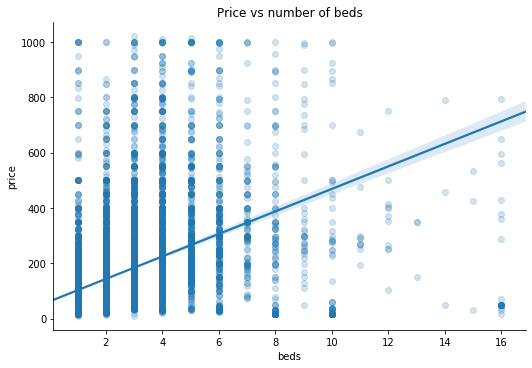

In [28]:
g = sns.lmplot(x = 'beds', y = 'price', data = drop_rating_no_outliers_la_airbnb, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of beds');

- We're still seeing a heavy skew with our outlining bed prices.  We'll try to reduce the outliers by bed type and number of beds.  Then repeat our process until now.

In [30]:
# Changing our function so that we are a bit more srict in our findings.
def find_outliers(dataseries):
    mean = np.mean(dataseries)
    std = np.std(dataseries)
    threshold = 1
    outliers = []
    
    for data in dataseries:
        z_score = (data - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(data)
    return(outliers)

In [57]:
ind_outliers_la_airbnb = cleaned_la_airbnbs.copy()

In [58]:
# Create an array with all different 'bed_types'
bed_types_array = ['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']

# Run a loop for number beds in our dataset
for bed_type in bed_types_array:
    for _ in range(1, 17):
        test_outliers = ind_outliers_la_airbnb[(ind_outliers_la_airbnb.loc[:, 'bed_type'] == bed_type) & (ind_outliers_la_airbnb.loc[:, 'beds'] == _)].price
        if len(test_outliers) > 1: 
            test_outliers = find_outliers(test_outliers)
            if len(test_outliers) >= 1:
                ind_outliers_la_airbnb.drop(ind_outliers_la_airbnb[(ind_outliers_la_airbnb.loc[:, 'bed_type'] == bed_type) & (ind_outliers_la_airbnb.loc[:, 'beds'] == _) & (ind_outliers_la_airbnb.loc[:, 'price'] >= min(test_outliers))].index, inplace = True)
        elif len(test_outliers) == 1:
                ind_outliers_la_airbnb.drop(ind_outliers_la_airbnb[(ind_outliers_la_airbnb.loc[:, 'bed_type'] == bed_type) & (ind_outliers_la_airbnb.loc[:, 'beds'] == _) & (ind_outliers_la_airbnb.loc[:, 'price'] >= min(test_outliers))].index, inplace = True)
            
ind_outliers_la_airbnb.shape

(30047, 46)

In [59]:
drop_rating_ind_outliers_la_airbnb = ind_outliers_la_airbnb.dropna(subset = ['review_scores_rating'])
drop_rating_ind_outliers_la_airbnb.shape

(23106, 46)

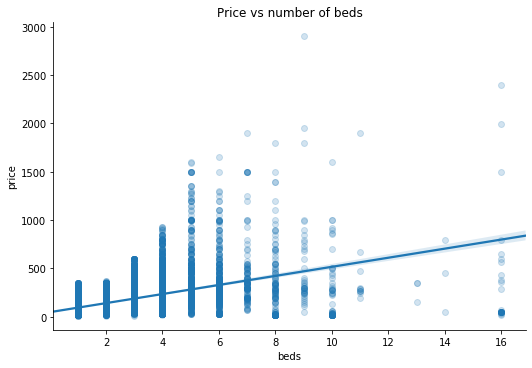

In [60]:
g = sns.lmplot(x = 'beds', y = 'price', data = drop_rating_ind_outliers_la_airbnb, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of beds');

In [61]:
target_col = 'price'
y = ind_outliers_la_airbnb.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms']
X = ind_outliers_la_airbnb.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.44685468100286097
0.4682486073455281


- We see that by checking each individual bed type and number of beds we get a more accurate findings of outliers.

In [63]:
# Create a new column for the log value of our target value price as everything was skewed left.
drop_rating_ind_outliers_la_airbnb.loc[:, 'price_log'] = drop_rating_ind_outliers_la_airbnb.loc[:, 'price'].transform(np.sqrt)

- Adding Los Angeles neighborhoods via area codes.

In [64]:
# Import dataset I created which contains zipcodes for each area code of Los Angeles.
central_area = pd.read_csv('../data/zips/area_codes/213.csv', header = None)[0].tolist()
westside_area = pd.read_csv('../data/zips/area_codes/310.csv', header = None)[0].tolist()
la_area = pd.read_csv('../data/zips/area_codes/323.csv', header = None)[0].tolist()
inland_area = pd.read_csv('../data/zips/area_codes/562.csv', header = None)[0].tolist()
pasadena_area = pd.read_csv('../data/zips/area_codes/626.csv', header = None)[0].tolist()
bakersfield_area = pd.read_csv('../data/zips/area_codes/661.csv', header = None)[0].tolist()
sfv_area = pd.read_csv('../data/zips/area_codes/818.csv', header = None)[0].tolist()
san_bernardino_area = pd.read_csv('../data/zips/area_codes/909.csv', header = None)[0].tolist()

In [66]:
count_central = 0
count_westside = 0
count_la = 0
count_inland = 0
count_pasadena = 0
count_bakersfield = 0
count_sfv = 0
count_san_bernardino = 0
count_other = 0
for zip_index, zip_row in drop_rating_ind_outliers_la_airbnb.iterrows():
    if drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in central_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 213
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Central Downtown'
        count_central += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in westside_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 310
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'West Los Angeles'
        count_westside += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in la_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 323
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Los Angeles'
        count_la += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in inland_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 562
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Inland Empire'
        count_inland += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in pasadena_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 626
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Pasadena'
        count_pasadena += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in bakersfield_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 661
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Bakersfield'
        count_pasadena += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in sfv_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 818
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'San Fernando Valley'
        count_sfv += 1
    elif drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zipcode'] in san_bernardino_area:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 909
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'San Bernardino'
        count_san_bernardino += 1
    else:
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'area_code'] = 0
        drop_rating_ind_outliers_la_airbnb.loc[zip_index, 'zip_area'] = 'Other'
        count_other += 1
print(count_central + count_westside + count_la + count_inland + count_pasadena + count_bakersfield + count_sfv + count_san_bernardino + count_other)

KeyboardInterrupt: 

## 6. Build our model

In [ ]:
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, target_col, feature_cols):
    y = df.loc[:, target_col]
    X = df.loc[:, feature_cols]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    return(np.sqrt(mse))

In [ ]:
# Create a scorer for our machine models.
def neg_rmse(y_true, y_pred):
    mse = np.square(y_true - y_pred).mean()
    return -np.sqrt(mse)

neg_rmse = make_scorer(neg_rmse)